In [1]:
import numpy as np
import matplotlib.pyplot as plt


212


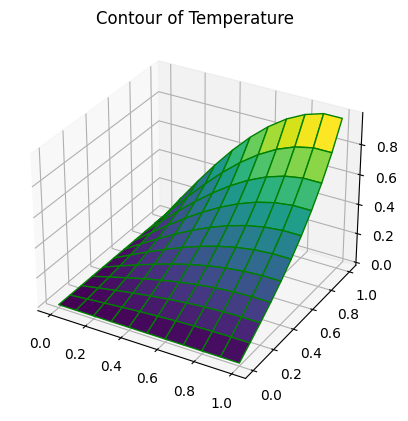

In [4]:
def Messure(A, B):
    N = len(B)
    s = 0
    for i in range(N):
        for j in range(N):
            s = s + (abs(A[i,j] - B[i,j]))**2

    return np.sqrt(s)

def U_b(x):
    return np.sin(np.pi * x / 2)

def LaPlaS_Simp(L_b, U_b, D_b, l, h, E):
    N = int(l/h) + 1
    x_s = np.zeros((N,N))
    
    x_s[:, 0] = D_b
    for i in range(N):
        x_s[i, N-1] = U_b(i*h)
    x_s[0, :] = L_b
    # x_s[N, :] = R_b        -  По идее должно быть так, но нет - не должно
    
    x, y = x_s, x_s
    k = 0

    dif = 1

    while k < 1000 and dif > E:
        y = x_s
        for i in range(1, N-1):
            for j in range(1, N-1):
                y[i,j] = (x[i-1,j]+x[i+1,j]+x[i,j-1]+x[i,j+1])/4
        y[-1] = y[-2]

        dif = Messure(x, y)
        if dif == 0: dif = 1
        x = y.copy()

        k+=1
    print(k)
    return (x)

def main():
    h = 0.1
    colorinterpolation = 50
    colourMap = plt.cm.jet

    x, y = np.linspace(0, 1, int(1/h) + 1), np.linspace(0, 1, int(1/h) + 1)
    X, Y = np.meshgrid(x, y)
    Z = LaPlaS_Simp(0, U_b, 0, 1, h, 0.0001)

    ax = plt.axes(projection='3d')
    ax.plot_surface(Y, X, Z, cmap='viridis', edgecolor='green')
    ax.set_title('Contour of Temperature')
    plt.show()

main()

125


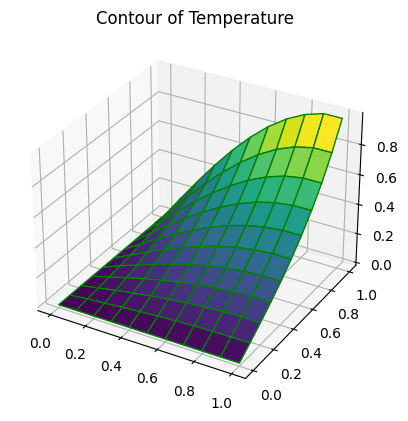

In [6]:
def Messure(A, B):
    N = len(B)
    s = 0
    for i in range(N):
        for j in range(N):
            s = s + (abs(A[i,j] - B[i,j]))**2

    return np.sqrt(s)

def U_b(x):
    return np.sin(np.pi * x / 2)

def LaPlaS_Zeydel(L_b, U_b, D_b, l, h, E):
    N = int(l/h) + 1
    x_s = np.zeros((N,N))
    
    x_s[:, 0] = D_b
    for i in range(N):
        x_s[i, N-1] = U_b(i*h)
    x_s[0, :] = L_b
    # x_s[N, :] = R_b        -  По идее должно быть так, но нет - не должно
    
    x, y = x_s, x_s
    k = 0

    dif = 1

    while k < 1000 and dif > E:
        for i in range(1, N-1):
            for j in range(1, N-1):
                x[i,j] = (x[i-1,j]+x[i+1,j]+x[i,j-1]+x[i,j+1])/4
        x[-1] = x[-2]

        dif = Messure(x, y)
        if dif == 0: dif = 1
        y = x.copy()

        k+=1
    print(k)
    return (x)

def main():
    h = 0.1
    colorinterpolation = 50
    colourMap = plt.cm.jet

    x, y = np.linspace(0, 1, int(1/h) + 1), np.linspace(0, 1, int(1/h) + 1)
    X, Y = np.meshgrid(x, y)
    Z = LaPlaS_Zeydel(0, U_b, 0, 1, h, 0.0001)

    ax = plt.axes(projection='3d')
    ax.plot_surface(Y, X, Z, cmap='viridis', edgecolor='green')
    ax.set_title('Contour of Temperature')
    plt.show()

main()

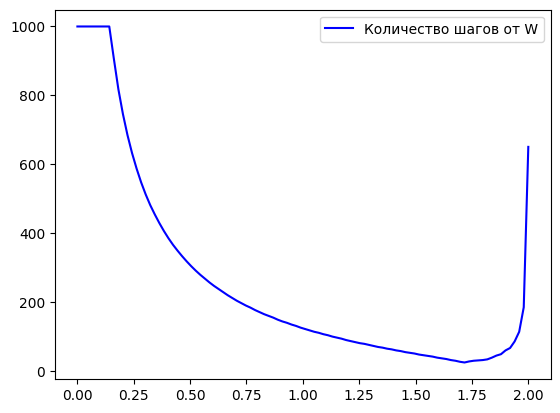

In [8]:
def Messure(A, B):
    N = len(B)
    s = 0
    for i in range(N):
        for j in range(N):
            s = s + (abs(A[i,j] - B[i,j]))**2

    return np.sqrt(s)

def U_b(x):
    return np.sin(np.pi * x / 2)

def LaPlaS_Relax(L_b, U_b, D_b, l, h, E, W):
    N = int(l/h) + 1
    x_s = np.zeros((N,N))
    
    x_s[:, 0] = D_b
    for i in range(N):
        x_s[i, N-1] = U_b(i*h)
    x_s[0, :] = L_b
    # x_s[N, :] = R_b        -  По идее должно быть так, но нет - не должно
    
    x, y = x_s, x_s
    k = 0

    dif = 1

    while k < 1000 and dif > E:
        for i in range(1, N-1):
            for j in range(1, N-1):
                x[i,j] = (1-W)*x[i,j] + W*(x[i-1,j]+x[i+1,j]+x[i,j-1]+x[i,j+1])/4
        x[-1] = x[-2]

        dif = Messure(x, y)
        if dif == 0: dif = 1
        y = x.copy()

        k+=1

    return (x, k)

def main():
    h = 0.1
    t = np.linspace(0, 2, 100)
    Z = np.zeros(len(t))

    for i in range(len(t)):
        temp = LaPlaS_Relax(0, U_b, 0, 1, h, 0.0001, t[i])[1]
        try:
            Z[i] = temp
        except TypeError or RuntimeWarning:
            Z[i] = 1000

    plt.plot(t, Z, color = 'blue', label = 'Количество шагов от W')
    plt.legend()
    plt.show()

main()